# Creating and Backtesting SMA Strategies

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
######################################
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
%config InlineBackend.figure_formats = "svg"
import seaborn as sns
sns.set()
######################################
import datetime as dt
import yfinance as yf

In [103]:
ticker = "CHFUSD=X"

#"EURUSD=X"

In [184]:
df = yf.download(tickers = ticker , period = "max" , multi_level_index=False )
df

/tmp/ipython-input-3622588296.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers = ticker , period = "max" , multi_level_index=False )
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2003-09-17,0.724270,0.727643,0.722543,0.723903,0
2003-09-18,0.721605,0.727431,0.721084,0.724533,0
2003-09-19,0.731582,0.732440,0.721241,0.721709,0
2003-09-22,0.739208,0.740631,0.733568,0.737300,0
2003-09-23,0.735998,0.745212,0.735456,0.739262,0
...,...,...,...,...,...
2026-02-02,1.292725,1.296059,1.279443,1.292875,0
2026-02-03,1.283681,1.291456,1.283549,1.283697,0
2026-02-04,1.289058,1.291322,1.286289,1.289193,0


In [185]:
df.columns[1:]

Index(['High', 'Low', 'Open', 'Volume'], dtype='object')

In [186]:
df.drop(labels = df.columns[1:], axis = "columns", inplace = True)
df.rename({"Close":"price"}, axis = 1, inplace=True)

In [113]:
df

,price
Date,
2003-09-17,0.724270
2003-09-18,0.721605
2003-09-19,0.731582
2003-09-22,0.739208
2003-09-23,0.735998
...,...
2026-02-02,1.292725
2026-02-03,1.283681
2026-02-04,1.289058


In [114]:
df.to_csv("CHFUSD=X.csv" , index = True)

In [115]:
df

,price
Date,
2003-09-17,0.724270
2003-09-18,0.721605
2003-09-19,0.731582
2003-09-22,0.739208
2003-09-23,0.735998
...,...
2026-02-02,1.292725
2026-02-03,1.283681
2026-02-04,1.289058


In [187]:
df.info(memory_usage=True , show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5822 entries, 2003-09-17 to 2026-02-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   5822 non-null   float64
dtypes: float64(1)
memory usage: 91.0 KB


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5822 entries, 2003-09-17 to 2026-02-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   5822 non-null   float64
dtypes: float64(1)
memory usage: 91.0 KB


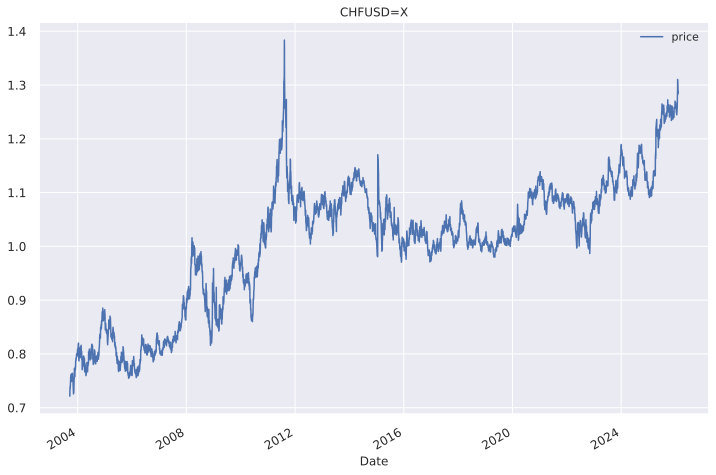

In [189]:
df.plot(figsize = (12, 8), title = ticker, fontsize = 12)
plt.show()

In [190]:
df["shifted_price"] = df.shift(1) #(price yesterday)
df

,price,shifted_price
Date,,
2003-09-17,0.724270,NaN
2003-09-18,0.721605,0.724270
2003-09-19,0.731582,0.721605
2003-09-22,0.739208,0.731582
2003-09-23,0.735998,0.739208
...,...,...
2026-02-02,1.292725,1.308198
2026-02-03,1.283681,1.292725
2026-02-04,1.289058,1.283681


In [192]:
df["simple_returns"] = df["price"]/df["shifted_price"] # price / (price yesterday)
df
# df["simple_returns"] - 1 = df["price"].pct_change()

,price,shifted_price,simple_returns
Date,,,
2003-09-17,0.724270,NaN,NaN
2003-09-18,0.721605,0.724270,0.996320
2003-09-19,0.731582,0.721605,1.013827
2003-09-22,0.739208,0.731582,1.010423
2003-09-23,0.735998,0.739208,0.995658
...,...,...,...
2026-02-02,1.292725,1.308198,0.988172
2026-02-03,1.283681,1.292725,0.993004
2026-02-04,1.289058,1.283681,1.004189


In [193]:
df["log_returns"] = np.log(df["simple_returns"])
df

,price,shifted_price,simple_returns,log_returns
Date,,,,
2003-09-17,0.724270,NaN,NaN,NaN
2003-09-18,0.721605,0.724270,0.996320,-0.003687
2003-09-19,0.731582,0.721605,1.013827,0.013732
2003-09-22,0.739208,0.731582,1.010423,0.010369
2003-09-23,0.735998,0.739208,0.995658,-0.004352
...,...,...,...,...
2026-02-02,1.292725,1.308198,0.988172,-0.011899
2026-02-03,1.283681,1.292725,0.993004,-0.007021
2026-02-04,1.289058,1.283681,1.004189,0.004181


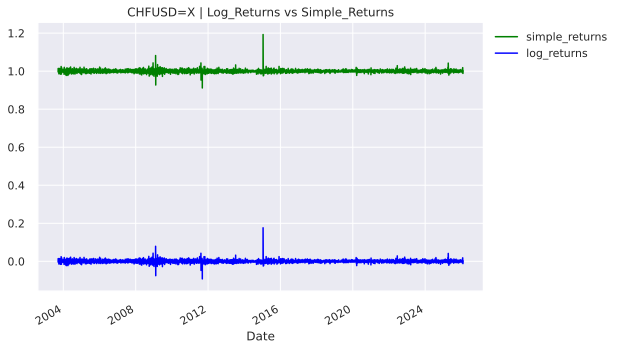

In [194]:
df[["simple_returns" , "log_returns"]].dropna().plot(kind = "line" ,
                                                     color = ["green" , "blue"],
                                                     title = f"{ticker} | Log_Returns vs Simple_Returns")
plt.legend(bbox_to_anchor = (1.3,1))
plt.show()

/tmp/ipython-input-189209702.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


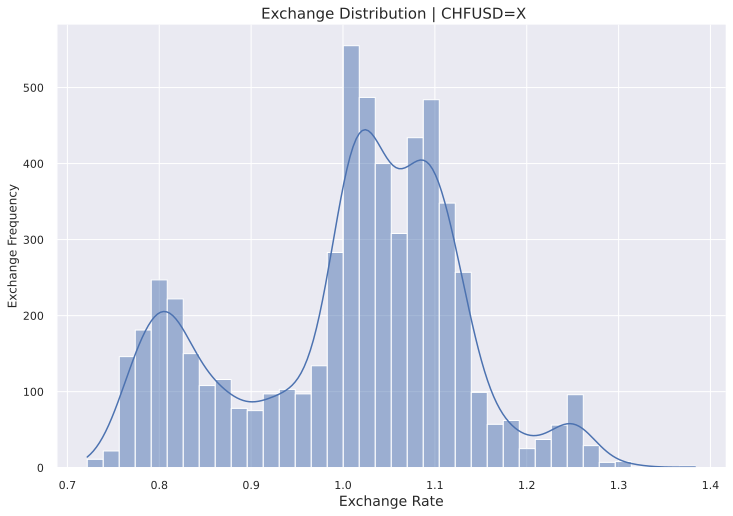

In [195]:
plt.figure(figsize = (12,8))
sns.histplot(data = df , x = "price" , kde = True , line_kws={"color":"red"})
plt.title(f" Exchange Distribution | {ticker}" , fontsize = 15)
plt.ylabel("Exchange Frequency" , fontsize = 12)
plt.xlabel("Exchange Rate" , fontsize = 14)
plt.legend()
sns.despine()

In [196]:
df.head()

,price,shifted_price,simple_returns,log_returns
Date,,,,
2003-09-17,0.724270,NaN,NaN,NaN
2003-09-18,0.721605,0.724270,0.996320,-0.003687
2003-09-19,0.731582,0.721605,1.013827,0.013732
2003-09-22,0.739208,0.731582,1.010423,0.010369
2003-09-23,0.735998,0.739208,0.995658,-0.004352


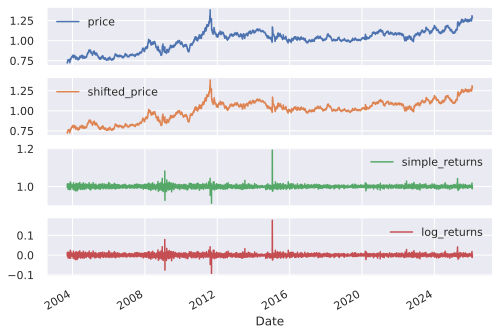

In [197]:
df.plot(subplots = True , sharex = True)
plt.show()

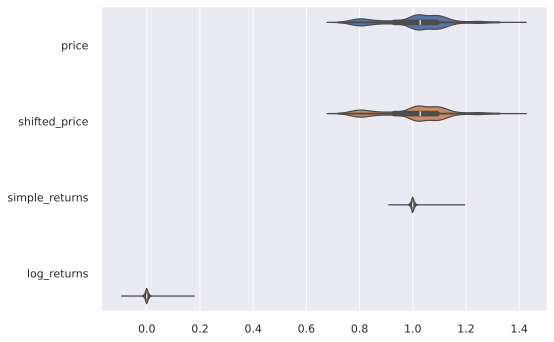

In [198]:
sns.violinplot(df , orient="h" , dodge=True)
sns.despine()

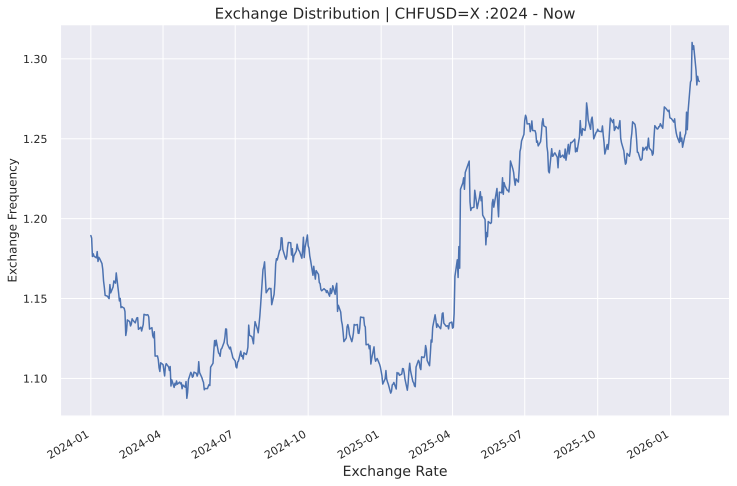

In [199]:
plt.figure(figsize = (12,8))
df.loc["2024": , "price"].plot()
plt.title(f"Exchange Distribution | {ticker} :2024 - Now" , fontsize = 15)
plt.ylabel("Exchange Frequency" , fontsize = 12)
plt.xlabel("Exchange Rate" , fontsize = 14)
plt.show()

In [200]:
df

,price,shifted_price,simple_returns,log_returns
Date,,,,
2003-09-17,0.724270,NaN,NaN,NaN
2003-09-18,0.721605,0.724270,0.996320,-0.003687
2003-09-19,0.731582,0.721605,1.013827,0.013732
2003-09-22,0.739208,0.731582,1.010423,0.010369
2003-09-23,0.735998,0.739208,0.995658,-0.004352
...,...,...,...,...
2026-02-02,1.292725,1.308198,0.988172,-0.011899
2026-02-03,1.283681,1.292725,0.993004,-0.007021
2026-02-04,1.289058,1.283681,1.004189,0.004181


In [201]:
df

,price,shifted_price,simple_returns,log_returns
Date,,,,
2003-09-17,0.724270,NaN,NaN,NaN
2003-09-18,0.721605,0.724270,0.996320,-0.003687
2003-09-19,0.731582,0.721605,1.013827,0.013732
2003-09-22,0.739208,0.731582,1.010423,0.010369
2003-09-23,0.735998,0.739208,0.995658,-0.004352
...,...,...,...,...
2026-02-02,1.292725,1.308198,0.988172,-0.011899
2026-02-03,1.283681,1.292725,0.993004,-0.007021
2026-02-04,1.289058,1.283681,1.004189,0.004181


## A simple Buy and Hold "Strategy"

In [202]:
df.dropna(inplace = True)

In [203]:
df

,price,shifted_price,simple_returns,log_returns
Date,,,,
2003-09-18,0.721605,0.724270,0.996320,-0.003687
2003-09-19,0.731582,0.721605,1.013827,0.013732
2003-09-22,0.739208,0.731582,1.010423,0.010369
2003-09-23,0.735998,0.739208,0.995658,-0.004352
2003-09-24,0.739645,0.735998,1.004956,0.004943
...,...,...,...,...
2026-02-02,1.292725,1.308198,0.988172,-0.011899
2026-02-03,1.283681,1.292725,0.993004,-0.007021
2026-02-04,1.289058,1.283681,1.004189,0.004181


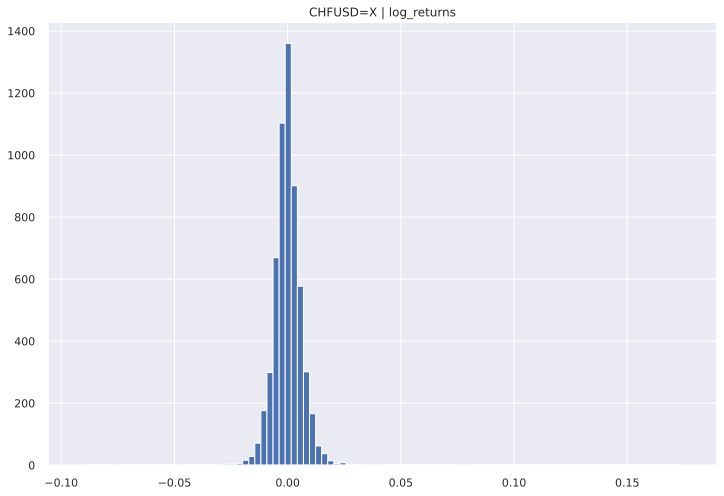

In [205]:
df["log_returns"].hist(bins = 100, figsize = (12, 8))
plt.title(f"{ticker} | log_returns")
plt.show()

In [206]:
df.simple_returns.sum()

np.float64(5821.702880174771)

In [207]:
df.log_returns.sum()

np.float64(0.5740050886960026)

In [208]:
np.exp(df.log_returns.sum())

np.float64(1.7753633189175113)

In [209]:
df.price.iloc[0]

np.float64(0.7216048240661621)

In [210]:
df.price.iloc[-1]

np.float64(1.2858428955078125)

In [211]:
df.price.iloc[-1] / df.price.iloc[0]

np.float64(1.7819211466218203)

In [214]:
df.log_returns.cumsum().apply(np.exp)
# the last element of the series is: np.exp(df.log_returns.sum())

,log_returns
Date,
2003-09-18,0.996320
2003-09-19,1.010096
2003-09-22,1.020624
2003-09-23,1.016192
2003-09-24,1.021228
...,...
2026-02-02,1.784865
2026-02-03,1.772378
2026-02-04,1.779803


In [217]:
df["cumulative_log_returns"] = df.log_returns.cumsum().apply(np.exp)
df["cumulative_log_returns"]
# df["cumulative_log_returns"] = df["simple_returns"].cumprod()

,cumulative_log_returns
Date,
2003-09-18,0.996320
2003-09-19,1.010096
2003-09-22,1.020624
2003-09-23,1.016192
2003-09-24,1.021228
...,...
2026-02-02,1.784865
2026-02-03,1.772378
2026-02-04,1.779803


In [218]:
df.head()

,price,shifted_price,simple_returns,log_returns,cumulative_log_returns
Date,,,,,
2003-09-18,0.721605,0.724270,0.996320,-0.003687,0.996320
2003-09-19,0.731582,0.721605,1.013827,0.013732,1.010096
2003-09-22,0.739208,0.731582,1.010423,0.010369,1.020624
2003-09-23,0.735998,0.739208,0.995658,-0.004352,1.016192
2003-09-24,0.739645,0.735998,1.004956,0.004943,1.021228


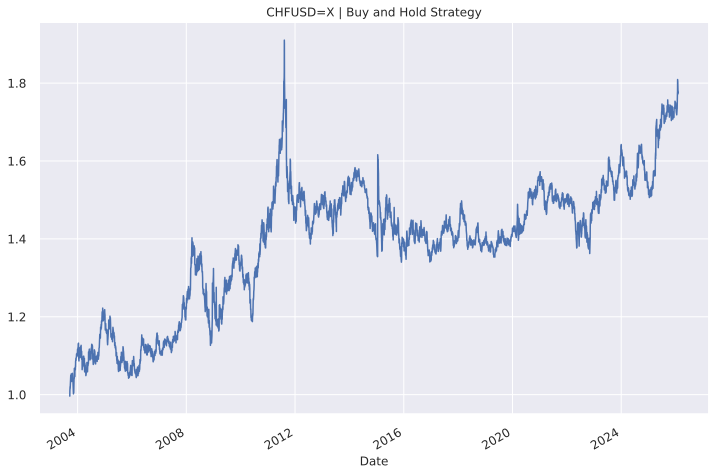

In [219]:
df.cumulative_log_returns.plot(figsize = (12, 8), title = f"{ticker} | Buy and Hold Strategy", fontsize = 12)
plt.show()

## More Performance Metrics

In [220]:
df

,price,shifted_price,simple_returns,log_returns,cumulative_log_returns
Date,,,,,
2003-09-18,0.721605,0.724270,0.996320,-0.003687,0.996320
2003-09-19,0.731582,0.721605,1.013827,0.013732,1.010096
2003-09-22,0.739208,0.731582,1.010423,0.010369,1.020624
2003-09-23,0.735998,0.739208,0.995658,-0.004352,1.016192
2003-09-24,0.739645,0.735998,1.004956,0.004943,1.021228
...,...,...,...,...,...
2026-02-02,1.292725,1.308198,0.988172,-0.011899,1.784865
2026-02-03,1.283681,1.292725,0.993004,-0.007021,1.772378
2026-02-04,1.289058,1.283681,1.004189,0.004181,1.779803


In [221]:
df.cumulative_log_returns.iloc[-1] # absolute Performance

np.float64(1.7753633189175089)

In [223]:
df.log_returns.sum() # absolute Performance

np.float64(0.5740050886960026)

In [225]:
df.describe()

,price,shifted_price,simple_returns,log_returns,cumulative_log_returns
count,5821.000000,5821.000000,5821.000000,5821.000000,5821.000000
mean,1.006822,1.006726,1.000121,0.000099,1.390120
std,0.122461,0.122462,0.006705,0.006631,0.169081
min,0.721605,0.721605,0.911782,-0.092355,0.996320
25%,0.931099,0.931012,0.996818,-0.003187,1.285568
50%,1.028066,1.028024,0.999901,-0.000099,1.419451
75%,1.090976,1.090976,1.003333,0.003328,1.506311
max,1.383509,1.383509,1.192568,0.176109,1.910210


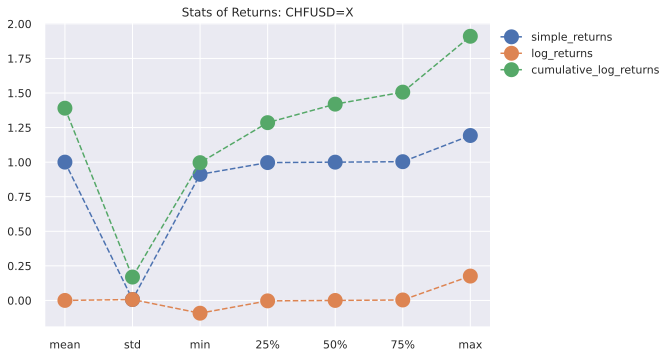

In [235]:
df.describe().iloc[1: , -3:].plot( marker = "o" , ms = 15 , ls = "--")
plt.title(f"Stats of Returns: {ticker}")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

__annualized mean return and risk__

In [236]:
df.log_returns.mean() * 252 # mean return

np.float64(0.024849558899053884)

In [237]:
df.log_returns.std() * np.sqrt(252) # risk

np.float64(0.10526394281507283)

__maximum drawdown__

In [238]:
df

,price,shifted_price,simple_returns,log_returns,cumulative_log_returns
Date,,,,,
2003-09-18,0.721605,0.724270,0.996320,-0.003687,0.996320
2003-09-19,0.731582,0.721605,1.013827,0.013732,1.010096
2003-09-22,0.739208,0.731582,1.010423,0.010369,1.020624
2003-09-23,0.735998,0.739208,0.995658,-0.004352,1.016192
2003-09-24,0.739645,0.735998,1.004956,0.004943,1.021228
...,...,...,...,...,...
2026-02-02,1.292725,1.308198,0.988172,-0.011899,1.784865
2026-02-03,1.283681,1.292725,0.993004,-0.007021,1.772378
2026-02-04,1.289058,1.283681,1.004189,0.004181,1.779803


In [242]:
df["cummax"] = df.cumulative_log_returns.cummax()
df["drawdown"] = df["cummax"] - df["cumulative_log_returns"]
df.head()

,price,shifted_price,simple_returns,log_returns,cumulative_log_returns,cummax,cummin,drawdown
Date,,,,,,,,
2003-09-18,0.721605,0.724270,0.996320,-0.003687,0.996320,0.996320,0.99632,0.000000
2003-09-19,0.731582,0.721605,1.013827,0.013732,1.010096,1.010096,0.99632,0.000000
2003-09-22,0.739208,0.731582,1.010423,0.010369,1.020624,1.020624,0.99632,0.000000
2003-09-23,0.735998,0.739208,0.995658,-0.004352,1.016192,1.020624,0.99632,0.004432
2003-09-24,0.739645,0.735998,1.004956,0.004943,1.021228,1.021228,0.99632,0.000000


In [245]:
df["cummin"] = df.cumulative_log_returns.cummin()
df["run_up"] =  df["cumulative_log_returns"] - df["cummin"]
df.head()

,price,shifted_price,simple_returns,log_returns,cumulative_log_returns,cummax,cummin,drawdown,run_up
Date,,,,,,,,,
2003-09-18,0.721605,0.724270,0.996320,-0.003687,0.996320,0.996320,0.99632,0.000000,0.000000
2003-09-19,0.731582,0.721605,1.013827,0.013732,1.010096,1.010096,0.99632,0.000000,0.013776
2003-09-22,0.739208,0.731582,1.010423,0.010369,1.020624,1.020624,0.99632,0.000000,0.024304
2003-09-23,0.735998,0.739208,0.995658,-0.004352,1.016192,1.020624,0.99632,0.004432,0.019872
2003-09-24,0.739645,0.735998,1.004956,0.004943,1.021228,1.021228,0.99632,0.000000,0.024908


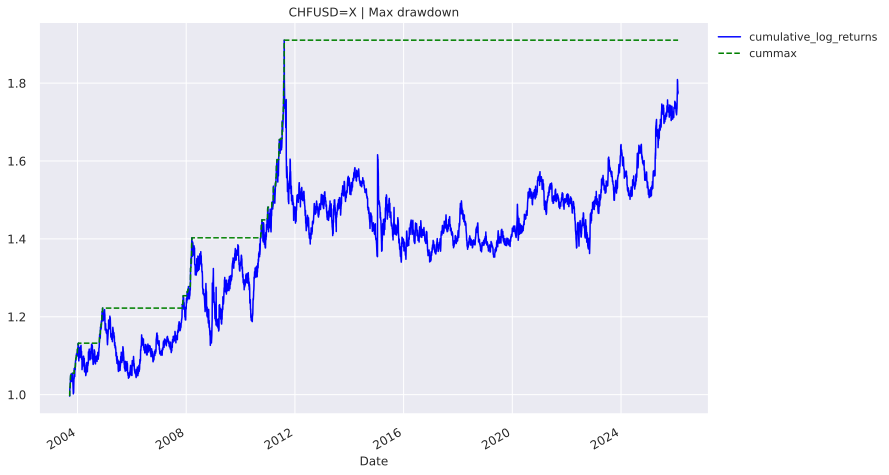

In [246]:
df[["cumulative_log_returns", "cummax"]].dropna().plot(figsize = (12, 8),
                                                       title = f"{ticker} | Max drawdown",
                                                       style = ["-", "--"],
                                                       color = ["blue" ,"green"],
                                                       fontsize = 12)
plt.legend(bbox_to_anchor = (1,1))
#plt.savefig("CHFUSD-MaxDrawDown.svg")
plt.show()

In [247]:
drawdown.max() # maximum drawdown

0.5699850854715336

In [248]:
drawdown.idxmax()

Timestamp('2015-11-30 00:00:00')

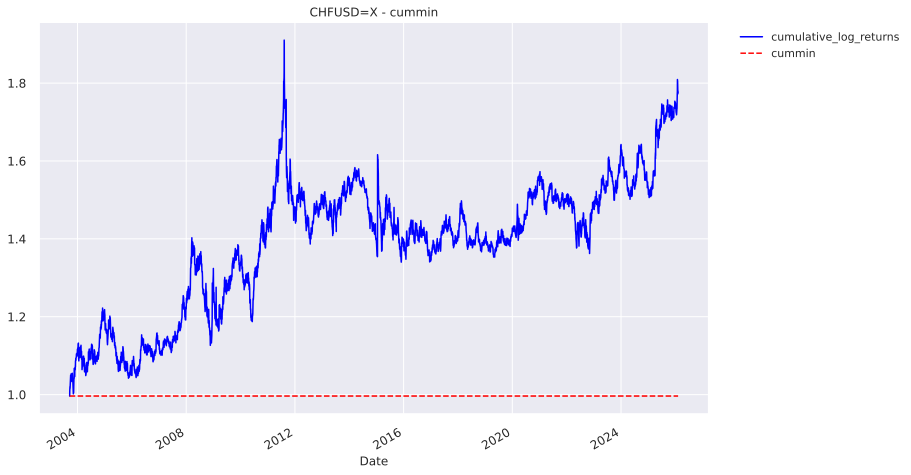

In [249]:
df[["cumulative_log_returns", "cummin"]].dropna().plot(title = f"{ticker} - cummin",
                                                       figsize = (12, 8),
                                                       fontsize = 12,
                                                       style = ["-" , "--"],
                                                       color = ["blue" , "red"])

plt.legend(bbox_to_anchor = (1.3,1))
plt.show()

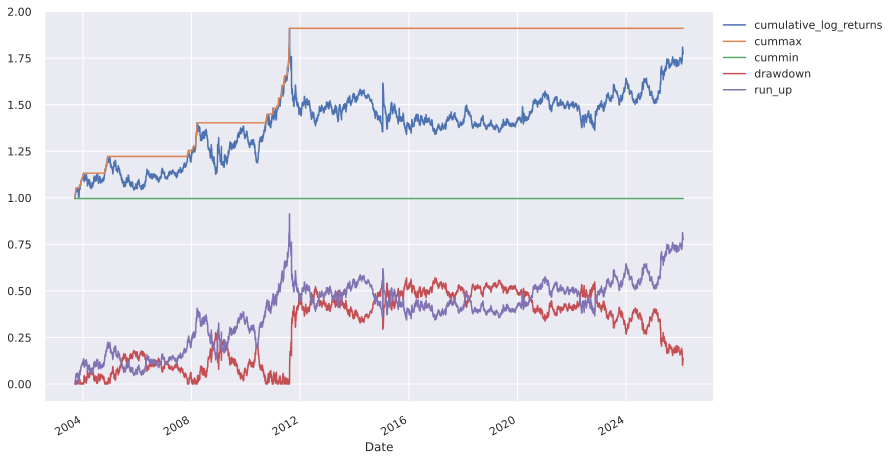

In [250]:
df[["cumulative_log_returns" , "cummax" , "cummin", "drawdown", "run_up"]].plot(figsize = (12,8))

plt.legend(bbox_to_anchor = (1,1))
plt.show()

## Defining an SMA Crossover Strategy

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [ ]:
#data = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [252]:
data = df

In [253]:
sma_s = 50
sma_l = 200

In [254]:
data.price.rolling(50).mean()

,price
Date,
2003-09-18,NaN
2003-09-19,NaN
2003-09-22,NaN
2003-09-23,NaN
2003-09-24,NaN
...,...
2026-02-02,1.258420
2026-02-03,1.259263
2026-02-04,1.260313


In [255]:
data["SMA_S"] = data.price.rolling(sma_s).mean()

In [256]:
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [257]:
data

,price,shifted_price,simple_returns,log_returns,cumulative_log_returns,cummax,cummin,drawdown,run_up,SMA_S,SMA_L
Date,,,,,,,,,,,
2003-09-18,0.721605,0.724270,0.996320,-0.003687,0.996320,0.996320,0.99632,0.000000,0.000000,NaN,NaN
2003-09-19,0.731582,0.721605,1.013827,0.013732,1.010096,1.010096,0.99632,0.000000,0.013776,NaN,NaN
2003-09-22,0.739208,0.731582,1.010423,0.010369,1.020624,1.020624,0.99632,0.000000,0.024304,NaN,NaN
2003-09-23,0.735998,0.739208,0.995658,-0.004352,1.016192,1.020624,0.99632,0.004432,0.019872,NaN,NaN
2003-09-24,0.739645,0.735998,1.004956,0.004943,1.021228,1.021228,0.99632,0.000000,0.024908,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2026-02-02,1.292725,1.308198,0.988172,-0.011899,1.784865,1.910210,0.99632,0.125345,0.788545,1.258420,1.244262
2026-02-03,1.283681,1.292725,0.993004,-0.007021,1.772378,1.910210,0.99632,0.137833,0.776058,1.259263,1.244648
2026-02-04,1.289058,1.283681,1.004189,0.004181,1.779803,1.910210,0.99632,0.130407,0.783483,1.260313,1.245057


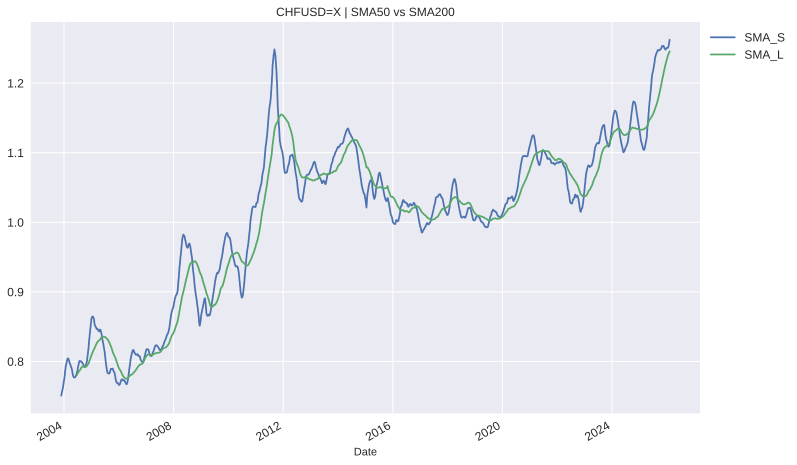

In [263]:
data[["SMA_S" , "SMA_L"]].plot(figsize = (12, 8), title = "{} | SMA{} vs SMA{}".format(ticker , sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12 , bbox_to_anchor = (1,1))
plt.show()

In [264]:
data.dropna(inplace = True)

In [265]:
data

,price,shifted_price,simple_returns,log_returns,cumulative_log_returns,cummax,cummin,drawdown,run_up,SMA_S,SMA_L
Date,,,,,,,,,,,
2004-06-23,0.797830,0.801154,0.995851,-0.004157,1.101564,1.132185,0.99632,0.030622,0.105244,0.784326,0.780554
2004-06-24,0.803665,0.797830,1.007313,0.007287,1.109620,1.132185,0.99632,0.022566,0.113300,0.784948,0.780964
2004-06-25,0.801925,0.803665,0.997835,-0.002167,1.107217,1.132185,0.99632,0.024968,0.110898,0.785548,0.781316
2004-06-28,0.800705,0.801925,0.998479,-0.001523,1.105533,1.132185,0.99632,0.026653,0.109213,0.786079,0.781623
2004-06-29,0.790889,0.800705,0.987741,-0.012335,1.091980,1.132185,0.99632,0.040205,0.095661,0.786673,0.781898
...,...,...,...,...,...,...,...,...,...,...,...
2026-02-02,1.292725,1.308198,0.988172,-0.011899,1.784865,1.910210,0.99632,0.125345,0.788545,1.258420,1.244262
2026-02-03,1.283681,1.292725,0.993004,-0.007021,1.772378,1.910210,0.99632,0.137833,0.776058,1.259263,1.244648
2026-02-04,1.289058,1.283681,1.004189,0.004181,1.779803,1.910210,0.99632,0.130407,0.783483,1.260313,1.245057


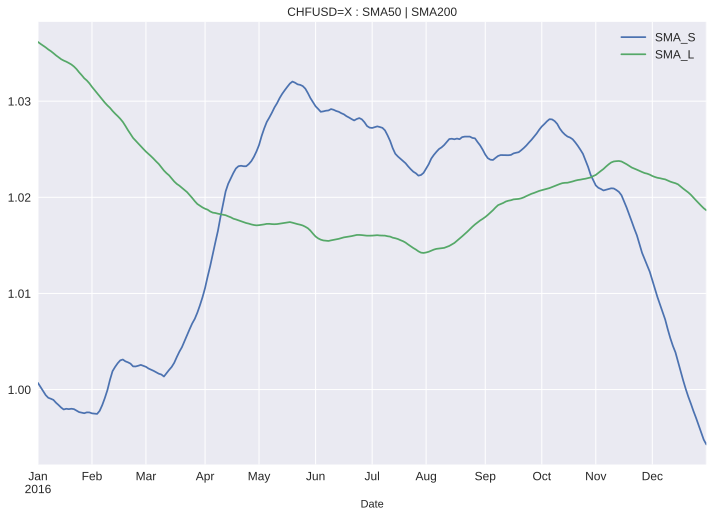

In [268]:
data.loc["2016" , ["SMA_S" , "SMA_L"]].plot(figsize = (12, 8),
                                            title = "{} : SMA{} | SMA{}".format(ticker , sma_s, sma_l),
                                            fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [269]:
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1 )

In [270]:
data

,price,shifted_price,simple_returns,log_returns,cumulative_log_returns,cummax,cummin,drawdown,run_up,SMA_S,SMA_L,position
Date,,,,,,,,,,,,
2004-06-23,0.797830,0.801154,0.995851,-0.004157,1.101564,1.132185,0.99632,0.030622,0.105244,0.784326,0.780554,1
2004-06-24,0.803665,0.797830,1.007313,0.007287,1.109620,1.132185,0.99632,0.022566,0.113300,0.784948,0.780964,1
2004-06-25,0.801925,0.803665,0.997835,-0.002167,1.107217,1.132185,0.99632,0.024968,0.110898,0.785548,0.781316,1
2004-06-28,0.800705,0.801925,0.998479,-0.001523,1.105533,1.132185,0.99632,0.026653,0.109213,0.786079,0.781623,1
2004-06-29,0.790889,0.800705,0.987741,-0.012335,1.091980,1.132185,0.99632,0.040205,0.095661,0.786673,0.781898,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-02,1.292725,1.308198,0.988172,-0.011899,1.784865,1.910210,0.99632,0.125345,0.788545,1.258420,1.244262,1
2026-02-03,1.283681,1.292725,0.993004,-0.007021,1.772378,1.910210,0.99632,0.137833,0.776058,1.259263,1.244648,1
2026-02-04,1.289058,1.283681,1.004189,0.004181,1.779803,1.910210,0.99632,0.130407,0.783483,1.260313,1.245057,1


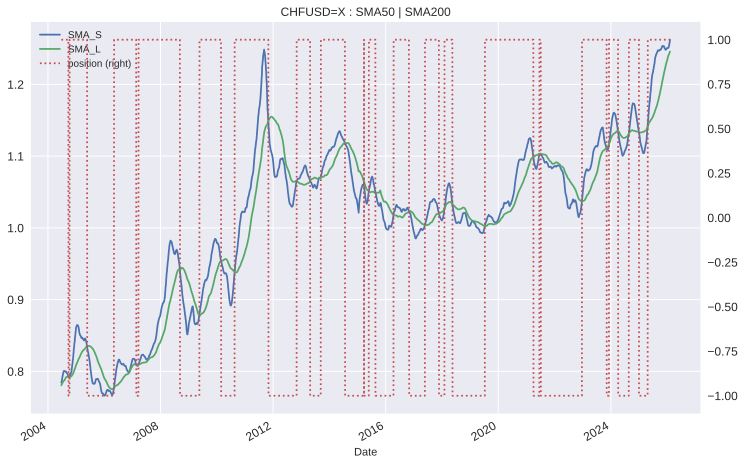

In [281]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8),
                                                 fontsize = 12,
                                                 secondary_y = "position",
                                                 style= ["-", "-" , ":"],
                                                 title = "{} : SMA{} | SMA{}".format(ticker , sma_s, sma_l))

plt.show()

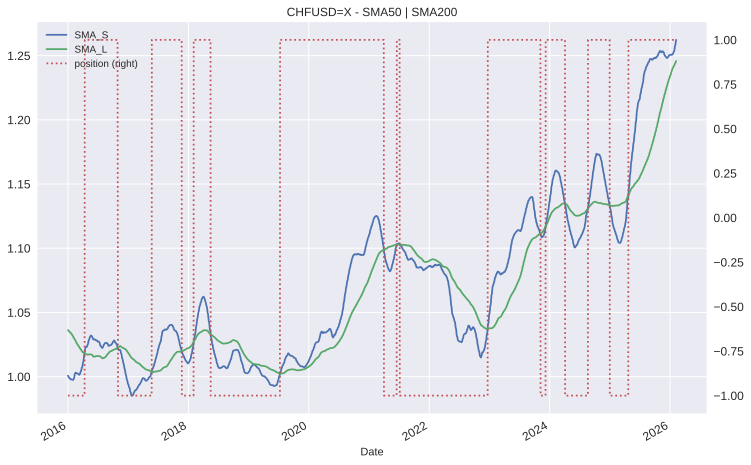

In [292]:
data.loc["2016":, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8),
                                                       fontsize = 12,
                                                       secondary_y = "position",
                                                       style= ["-", "-" , ":"],
                                                       title = "{} - SMA{} | SMA{}".format(ticker , sma_s, sma_l))
plt.show()

## Vectorized Strategy Backtesting

In [293]:
data

,price,shifted_price,simple_returns,log_returns,cumulative_log_returns,cummax,cummin,drawdown,run_up,SMA_S,SMA_L,position
Date,,,,,,,,,,,,
2004-06-23,0.797830,0.801154,0.995851,-0.004157,1.101564,1.132185,0.99632,0.030622,0.105244,0.784326,0.780554,1
2004-06-24,0.803665,0.797830,1.007313,0.007287,1.109620,1.132185,0.99632,0.022566,0.113300,0.784948,0.780964,1
2004-06-25,0.801925,0.803665,0.997835,-0.002167,1.107217,1.132185,0.99632,0.024968,0.110898,0.785548,0.781316,1
2004-06-28,0.800705,0.801925,0.998479,-0.001523,1.105533,1.132185,0.99632,0.026653,0.109213,0.786079,0.781623,1
2004-06-29,0.790889,0.800705,0.987741,-0.012335,1.091980,1.132185,0.99632,0.040205,0.095661,0.786673,0.781898,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-02,1.292725,1.308198,0.988172,-0.011899,1.784865,1.910210,0.99632,0.125345,0.788545,1.258420,1.244262,1
2026-02-03,1.283681,1.292725,0.993004,-0.007021,1.772378,1.910210,0.99632,0.137833,0.776058,1.259263,1.244648,1
2026-02-04,1.289058,1.283681,1.004189,0.004181,1.779803,1.910210,0.99632,0.130407,0.783483,1.260313,1.245057,1


In [ ]:
#data["returns"] = data.price.pct_change()
# df["price"].pct_change() = df["simple_returns"] - 1

In [301]:
df

,price,shifted_price,simple_returns,log_returns,cumulative_log_returns,cummax,cummin,drawdown,run_up,SMA_S,SMA_L,position
Date,,,,,,,,,,,,
2004-06-23,0.797830,0.801154,0.995851,-0.004157,1.101564,1.132185,0.99632,0.030622,0.105244,0.784326,0.780554,1
2004-06-24,0.803665,0.797830,1.007313,0.007287,1.109620,1.132185,0.99632,0.022566,0.113300,0.784948,0.780964,1
2004-06-25,0.801925,0.803665,0.997835,-0.002167,1.107217,1.132185,0.99632,0.024968,0.110898,0.785548,0.781316,1
2004-06-28,0.800705,0.801925,0.998479,-0.001523,1.105533,1.132185,0.99632,0.026653,0.109213,0.786079,0.781623,1
2004-06-29,0.790889,0.800705,0.987741,-0.012335,1.091980,1.132185,0.99632,0.040205,0.095661,0.786673,0.781898,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-02,1.292725,1.308198,0.988172,-0.011899,1.784865,1.910210,0.99632,0.125345,0.788545,1.258420,1.244262,1
2026-02-03,1.283681,1.292725,0.993004,-0.007021,1.772378,1.910210,0.99632,0.137833,0.776058,1.259263,1.244648,1
2026-02-04,1.289058,1.283681,1.004189,0.004181,1.779803,1.910210,0.99632,0.130407,0.783483,1.260313,1.245057,1


In [ ]:
#data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [310]:
# Recap: data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1 )
data["strategy"] = data.position.shift(1) * data["log_returns"]
data

,price,shifted_price,simple_returns,log_returns,cumulative_log_returns,cummax,cummin,drawdown,run_up,SMA_S,SMA_L,position,strategy
Date,,,,,,,,,,,,,
2004-06-24,0.803665,0.797830,1.007313,0.007287,1.109620,1.132185,0.99632,0.022566,0.113300,0.784948,0.780964,1,NaN
2004-06-25,0.801925,0.803665,0.997835,-0.002167,1.107217,1.132185,0.99632,0.024968,0.110898,0.785548,0.781316,1,-0.002167
2004-06-28,0.800705,0.801925,0.998479,-0.001523,1.105533,1.132185,0.99632,0.026653,0.109213,0.786079,0.781623,1,-0.001523
2004-06-29,0.790889,0.800705,0.987741,-0.012335,1.091980,1.132185,0.99632,0.040205,0.095661,0.786673,0.781898,1,-0.012335
2004-06-30,0.799744,0.790889,1.011196,0.011134,1.104207,1.132185,0.99632,0.027979,0.107887,0.787473,0.782198,1,0.011134
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-02,1.292725,1.308198,0.988172,-0.011899,1.784865,1.910210,0.99632,0.125345,0.788545,1.258420,1.244262,1,-0.011899
2026-02-03,1.283681,1.292725,0.993004,-0.007021,1.772378,1.910210,0.99632,0.137833,0.776058,1.259263,1.244648,1,-0.007021
2026-02-04,1.289058,1.283681,1.004189,0.004181,1.779803,1.910210,0.99632,0.130407,0.783483,1.260313,1.245057,1,0.004181


In [311]:
data.dropna(inplace = True)

In [312]:
data[["log_returns", "strategy"]].sum() # absolute performance

,0
log_returns,0.469988
strategy,-0.108938


In [313]:
data[["log_returns", "strategy"]].sum().apply(np.exp) # absolute performance

,0
log_returns,1.599974
strategy,0.896786


In [314]:
data[["log_returns", "strategy"]].mean() * 252 # annualized return

,0
log_returns,0.021074
strategy,-0.004885


In [315]:
data[["log_returns", "strategy"]].std() * np.sqrt(252) # annualized risk

,0
log_returns,0.104217
strategy,0.104225


In [316]:
# data["cumulative_log_returns"] = data["log_returns"].cumsum().apply(np.exp)
# data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1 )
# data["strategy"] = data.position.shift(1) * data["log_returns"]
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data.rename({"cumulative_log_returns" : "creturns"} , axis = 1 , inplace = True)

In [317]:
data

,price,shifted_price,simple_returns,log_returns,creturns,cummax,cummin,drawdown,run_up,SMA_S,SMA_L,position,strategy,cstrategy
Date,,,,,,,,,,,,,,
2004-06-25,0.801925,0.803665,0.997835,-0.002167,1.107217,1.132185,0.99632,0.024968,0.110898,0.785548,0.781316,1,-0.002167,0.997835
2004-06-28,0.800705,0.801925,0.998479,-0.001523,1.105533,1.132185,0.99632,0.026653,0.109213,0.786079,0.781623,1,-0.001523,0.996317
2004-06-29,0.790889,0.800705,0.987741,-0.012335,1.091980,1.132185,0.99632,0.040205,0.095661,0.786673,0.781898,1,-0.012335,0.984103
2004-06-30,0.799744,0.790889,1.011196,0.011134,1.104207,1.132185,0.99632,0.027979,0.107887,0.787473,0.782198,1,0.011134,0.995122
2004-07-01,0.800641,0.799744,1.001121,0.001120,1.105444,1.132185,0.99632,0.026741,0.109125,0.788179,0.782483,1,0.001120,0.996237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-02,1.292725,1.308198,0.988172,-0.011899,1.784865,1.910210,0.99632,0.125345,0.788545,1.258420,1.244262,1,-0.011899,0.901585
2026-02-03,1.283681,1.292725,0.993004,-0.007021,1.772378,1.910210,0.99632,0.137833,0.776058,1.259263,1.244648,1,-0.007021,0.895278
2026-02-04,1.289058,1.283681,1.004189,0.004181,1.779803,1.910210,0.99632,0.130407,0.783483,1.260313,1.245057,1,0.004181,0.899029


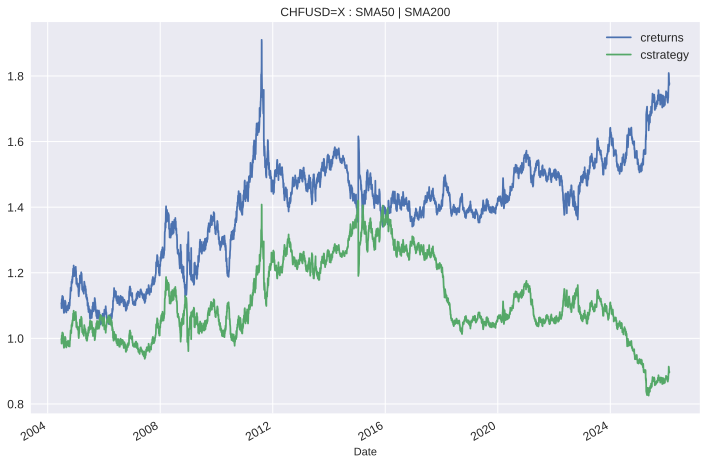

In [322]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8),
                                     title = "{} : SMA{} | SMA{}".format(ticker , sma_s , sma_l),
                                     fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

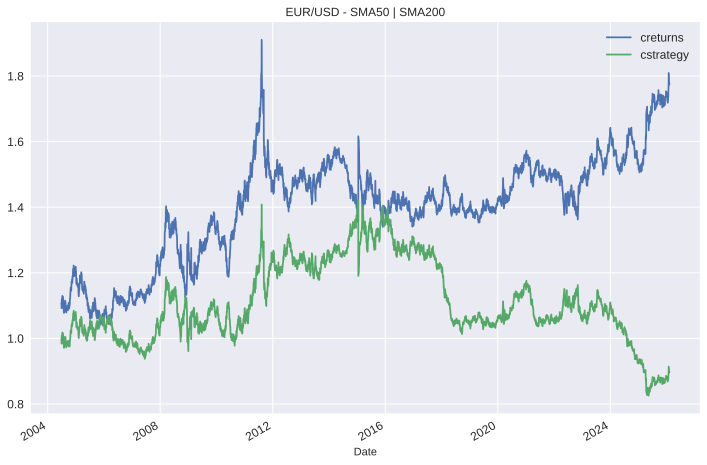

In [320]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [323]:
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

np.float64(-0.8785774106719891)

## Finding the optimal SMA Strategy

In [325]:
#df = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [327]:
df

,price,shifted_price,simple_returns,log_returns,creturns,cummax,cummin,drawdown,run_up,SMA_S,SMA_L,position,strategy,cstrategy
Date,,,,,,,,,,,,,,
2004-06-25,0.801925,0.803665,0.997835,-0.002167,1.107217,1.132185,0.99632,0.024968,0.110898,0.785548,0.781316,1,-0.002167,0.997835
2004-06-28,0.800705,0.801925,0.998479,-0.001523,1.105533,1.132185,0.99632,0.026653,0.109213,0.786079,0.781623,1,-0.001523,0.996317
2004-06-29,0.790889,0.800705,0.987741,-0.012335,1.091980,1.132185,0.99632,0.040205,0.095661,0.786673,0.781898,1,-0.012335,0.984103
2004-06-30,0.799744,0.790889,1.011196,0.011134,1.104207,1.132185,0.99632,0.027979,0.107887,0.787473,0.782198,1,0.011134,0.995122
2004-07-01,0.800641,0.799744,1.001121,0.001120,1.105444,1.132185,0.99632,0.026741,0.109125,0.788179,0.782483,1,0.001120,0.996237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-02,1.292725,1.308198,0.988172,-0.011899,1.784865,1.910210,0.99632,0.125345,0.788545,1.258420,1.244262,1,-0.011899,0.901585
2026-02-03,1.283681,1.292725,0.993004,-0.007021,1.772378,1.910210,0.99632,0.137833,0.776058,1.259263,1.244648,1,-0.007021,0.895278
2026-02-04,1.289058,1.283681,1.004189,0.004181,1.779803,1.910210,0.99632,0.130407,0.783483,1.260313,1.245057,1,0.004181,0.899029


In [328]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)

    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)


    return data[["returns", "strategy"]].sum().apply(np.exp).iloc[-1]

In [329]:
run_strategy((50, 200))

np.float64(0.8803647422983921)

In [330]:
run_strategy((10, 50))

np.float64(0.7428251996527089)

In [331]:
run_strategy((22, 252))

np.float64(0.6968565135576876)

In [332]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)

    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)


    return -data[["returns", "strategy"]].sum().apply(np.exp).iloc[-1] # maximize absolute performance

In [326]:
from scipy.optimize import brute

In [334]:
brute(run_strategy, ((10, 50, 1), (100, 252, 1)))

array([ 30., 106.])

In [335]:
- run_strategy((46, 137))

np.float64(0.7368953548531492)

## Trades and Transaction Costs (Part 1)

In [336]:
data # sma 50/200 strategy

,price,shifted_price,simple_returns,log_returns,creturns,cummax,cummin,drawdown,run_up,SMA_S,SMA_L,position,strategy,cstrategy
Date,,,,,,,,,,,,,,
2004-06-25,0.801925,0.803665,0.997835,-0.002167,1.107217,1.132185,0.99632,0.024968,0.110898,0.785548,0.781316,1,-0.002167,0.997835
2004-06-28,0.800705,0.801925,0.998479,-0.001523,1.105533,1.132185,0.99632,0.026653,0.109213,0.786079,0.781623,1,-0.001523,0.996317
2004-06-29,0.790889,0.800705,0.987741,-0.012335,1.091980,1.132185,0.99632,0.040205,0.095661,0.786673,0.781898,1,-0.012335,0.984103
2004-06-30,0.799744,0.790889,1.011196,0.011134,1.104207,1.132185,0.99632,0.027979,0.107887,0.787473,0.782198,1,0.011134,0.995122
2004-07-01,0.800641,0.799744,1.001121,0.001120,1.105444,1.132185,0.99632,0.026741,0.109125,0.788179,0.782483,1,0.001120,0.996237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-02,1.292725,1.308198,0.988172,-0.011899,1.784865,1.910210,0.99632,0.125345,0.788545,1.258420,1.244262,1,-0.011899,0.901585
2026-02-03,1.283681,1.292725,0.993004,-0.007021,1.772378,1.910210,0.99632,0.137833,0.776058,1.259263,1.244648,1,-0.007021,0.895278
2026-02-04,1.289058,1.283681,1.004189,0.004181,1.779803,1.910210,0.99632,0.130407,0.783483,1.260313,1.245057,1,0.004181,0.899029


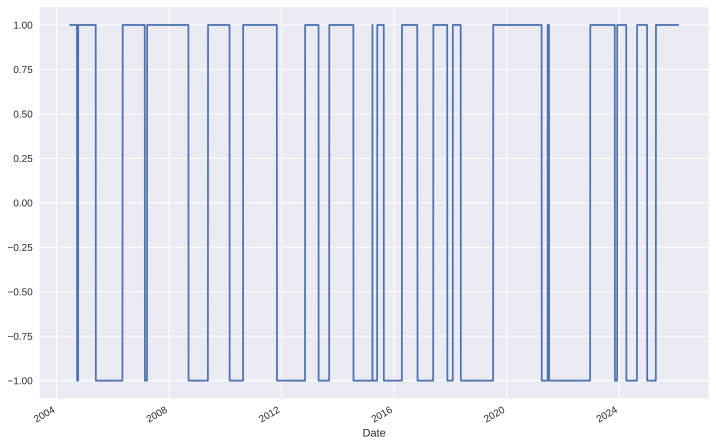

In [337]:
data.loc[:, "position"].plot(figsize = (12 , 8))
plt.show()

In [338]:
data.position.diff().fillna(0).abs()

,position
Date,
2004-06-25,0.0
2004-06-28,0.0
2004-06-29,0.0
2004-06-30,0.0
2004-07-01,0.0
...,...
2026-02-02,0.0
2026-02-03,0.0
2026-02-04,0.0


In [339]:
data["trades"] = data.position.diff().fillna(0).abs()

In [340]:
data

,price,shifted_price,simple_returns,log_returns,creturns,cummax,cummin,drawdown,run_up,SMA_S,SMA_L,position,strategy,cstrategy,trades
Date,,,,,,,,,,,,,,,
2004-06-25,0.801925,0.803665,0.997835,-0.002167,1.107217,1.132185,0.99632,0.024968,0.110898,0.785548,0.781316,1,-0.002167,0.997835,0.0
2004-06-28,0.800705,0.801925,0.998479,-0.001523,1.105533,1.132185,0.99632,0.026653,0.109213,0.786079,0.781623,1,-0.001523,0.996317,0.0
2004-06-29,0.790889,0.800705,0.987741,-0.012335,1.091980,1.132185,0.99632,0.040205,0.095661,0.786673,0.781898,1,-0.012335,0.984103,0.0
2004-06-30,0.799744,0.790889,1.011196,0.011134,1.104207,1.132185,0.99632,0.027979,0.107887,0.787473,0.782198,1,0.011134,0.995122,0.0
2004-07-01,0.800641,0.799744,1.001121,0.001120,1.105444,1.132185,0.99632,0.026741,0.109125,0.788179,0.782483,1,0.001120,0.996237,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-02,1.292725,1.308198,0.988172,-0.011899,1.784865,1.910210,0.99632,0.125345,0.788545,1.258420,1.244262,1,-0.011899,0.901585,0.0
2026-02-03,1.283681,1.292725,0.993004,-0.007021,1.772378,1.910210,0.99632,0.137833,0.776058,1.259263,1.244648,1,-0.007021,0.895278,0.0
2026-02-04,1.289058,1.283681,1.004189,0.004181,1.779803,1.910210,0.99632,0.130407,0.783483,1.260313,1.245057,1,0.004181,0.899029,0.0


In [341]:
data.trades.value_counts()

,count
trades,
0.0,5584
2.0,36


## Trades and Trading Costs (Part 2)

(simplified approximation for vectorized backtesting)

In [342]:
spread = 1.5 * 0.0001 # pips == Fourth price decimal
commissions = 0

In [343]:
half_spread = spread / 2 # absolute tc per trade (position change +-1)
half_spread * 100000

7.500000000000001

In [344]:
ptc = half_spread / data.price.mean() # proportional tc per trade (position change +-1)
ptc

np.float64(7.389811301314356e-05)

In [345]:
ptc = 0.00007

In [346]:
data

,price,shifted_price,simple_returns,log_returns,creturns,cummax,cummin,drawdown,run_up,SMA_S,SMA_L,position,strategy,cstrategy,trades
Date,,,,,,,,,,,,,,,
2004-06-25,0.801925,0.803665,0.997835,-0.002167,1.107217,1.132185,0.99632,0.024968,0.110898,0.785548,0.781316,1,-0.002167,0.997835,0.0
2004-06-28,0.800705,0.801925,0.998479,-0.001523,1.105533,1.132185,0.99632,0.026653,0.109213,0.786079,0.781623,1,-0.001523,0.996317,0.0
2004-06-29,0.790889,0.800705,0.987741,-0.012335,1.091980,1.132185,0.99632,0.040205,0.095661,0.786673,0.781898,1,-0.012335,0.984103,0.0
2004-06-30,0.799744,0.790889,1.011196,0.011134,1.104207,1.132185,0.99632,0.027979,0.107887,0.787473,0.782198,1,0.011134,0.995122,0.0
2004-07-01,0.800641,0.799744,1.001121,0.001120,1.105444,1.132185,0.99632,0.026741,0.109125,0.788179,0.782483,1,0.001120,0.996237,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-02,1.292725,1.308198,0.988172,-0.011899,1.784865,1.910210,0.99632,0.125345,0.788545,1.258420,1.244262,1,-0.011899,0.901585,0.0
2026-02-03,1.283681,1.292725,0.993004,-0.007021,1.772378,1.910210,0.99632,0.137833,0.776058,1.259263,1.244648,1,-0.007021,0.895278,0.0
2026-02-04,1.289058,1.283681,1.004189,0.004181,1.779803,1.910210,0.99632,0.130407,0.783483,1.260313,1.245057,1,0.004181,0.899029,0.0


In [347]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [348]:
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [349]:
data

,price,shifted_price,simple_returns,log_returns,creturns,cummax,cummin,drawdown,run_up,SMA_S,SMA_L,position,strategy,cstrategy,trades,strategy_net,cstrategy_net
Date,,,,,,,,,,,,,,,,,
2004-06-25,0.801925,0.803665,0.997835,-0.002167,1.107217,1.132185,0.99632,0.024968,0.110898,0.785548,0.781316,1,-0.002167,0.997835,0.0,-0.002167,0.997835
2004-06-28,0.800705,0.801925,0.998479,-0.001523,1.105533,1.132185,0.99632,0.026653,0.109213,0.786079,0.781623,1,-0.001523,0.996317,0.0,-0.001523,0.996317
2004-06-29,0.790889,0.800705,0.987741,-0.012335,1.091980,1.132185,0.99632,0.040205,0.095661,0.786673,0.781898,1,-0.012335,0.984103,0.0,-0.012335,0.984103
2004-06-30,0.799744,0.790889,1.011196,0.011134,1.104207,1.132185,0.99632,0.027979,0.107887,0.787473,0.782198,1,0.011134,0.995122,0.0,0.011134,0.995122
2004-07-01,0.800641,0.799744,1.001121,0.001120,1.105444,1.132185,0.99632,0.026741,0.109125,0.788179,0.782483,1,0.001120,0.996237,0.0,0.001120,0.996237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-02,1.292725,1.308198,0.988172,-0.011899,1.784865,1.910210,0.99632,0.125345,0.788545,1.258420,1.244262,1,-0.011899,0.901585,0.0,-0.011899,0.897053
2026-02-03,1.283681,1.292725,0.993004,-0.007021,1.772378,1.910210,0.99632,0.137833,0.776058,1.259263,1.244648,1,-0.007021,0.895278,0.0,-0.007021,0.890777
2026-02-04,1.289058,1.283681,1.004189,0.004181,1.779803,1.910210,0.99632,0.130407,0.783483,1.260313,1.245057,1,0.004181,0.899029,0.0,0.004181,0.894509


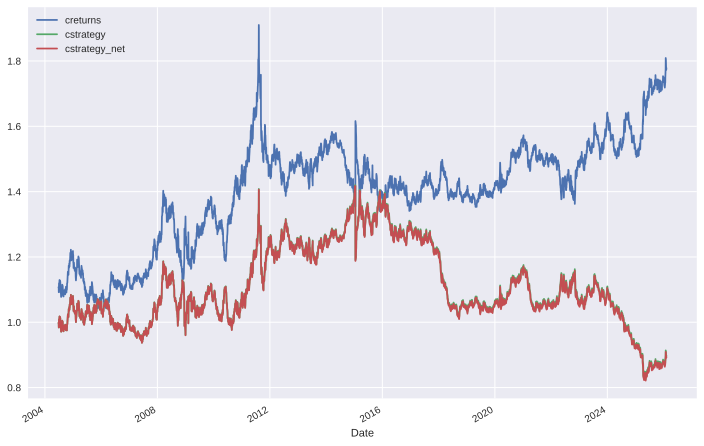

In [350]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

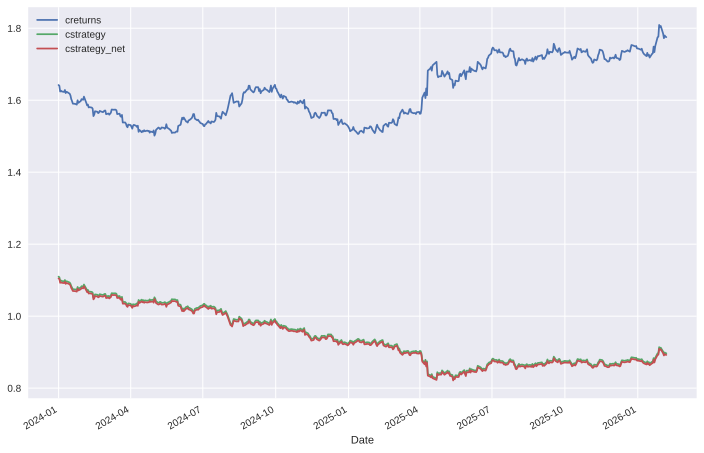

In [351]:
data.loc["2024":, ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()